In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Accidents.csv')

In [3]:
df.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [4]:
df.shape

(12316, 15)

In [5]:
columns_to_check = ['Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Accident_severity', 
                    'Lanes_or_Medians', 'Light_conditions', 'Vehicle_movement', 'Pedestrian_movement', 'Road_surface_type']
unique_values = {col: df[col].unique() for col in columns_to_check}

# Print unique values
for col, values in unique_values.items():
    print(f"{col}: {values}")

Sex_of_driver: ['Male' 'Female' 'Unknown']
Educational_level: ['Above high school' 'Junior high school' 'Unknown' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
Vehicle_driver_relation: ['Employee' 'Unknown' 'Owner' 'Other']
Accident_severity: [2 1 0]
Lanes_or_Medians: ['Unknown' 'Undivided Two way' 'other' 'Double carriageway (median)'
 'One way' 'Two-way (divided with solid lines road marking)'
 'Two-way (divided with broken lines road marking)']
Light_conditions: ['Daylight' 'Darkness - lights lit' 'Darkness - no lighting'
 'Darkness - lights unlit']
Vehicle_movement: ['Going straight' 'U-Turn' 'Moving Backward' 'Turnover' 'Waiting to go'
 'Getting off' 'Reversing' 'Unknown' 'Parked' 'Stopping' 'Overtaking'
 'Other' 'Entering a junction']
Pedestrian_movement: ['Not a Pedestrian' "Crossing from driver's nearside"
 'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle'
 'Unknown or other'
 'Crossing from offside - masked by  parked or sta

In [6]:
#Drop Unneccesary columns 

df.drop(['Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Accident_severity', 
                'Lanes_or_Medians', 'Light_conditions', 'Vehicle_movement', 'Pedestrian_movement', 'Road_surface_type'],
        axis = 1, inplace = True)

In [7]:
df.columns 

Index(['Age_band_of_driver', 'Driving_experience', 'Types_of_Junction',
       'Weather_conditions', 'Type_of_collision', 'Cause_of_accident'],
      dtype='object')

In [8]:
df['Driving_experience'].value_counts() 

Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
Unknown        829
No Licence     118
unknown         33
Name: count, dtype: int64

In [9]:
df['Age_band_of_driver'].value_counts()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

In [10]:
df['Cause_of_accident'].value_counts()

Cause_of_accident
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: count, dtype: int64

In [11]:
df.dtypes

Age_band_of_driver    object
Driving_experience    object
Types_of_Junction     object
Weather_conditions    object
Type_of_collision     object
Cause_of_accident     object
dtype: object

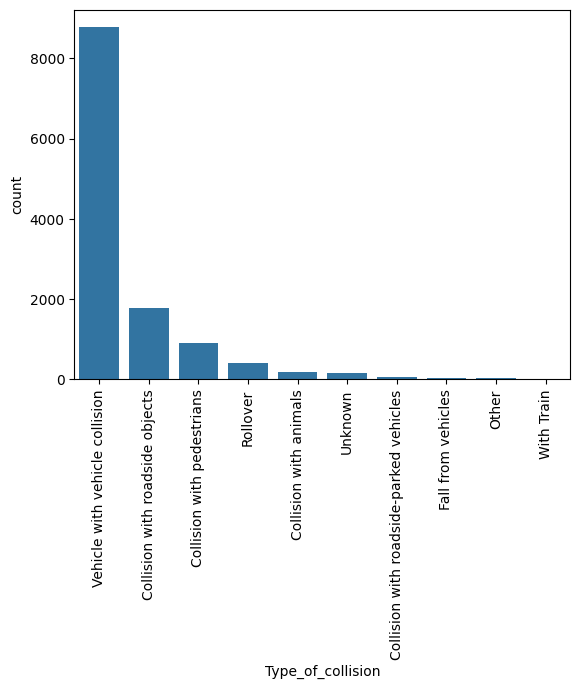

In [12]:
# Count the occurrences of each type of collision
collision_counts = df["Type_of_collision"].value_counts().reset_index()
collision_counts.columns = ["Type_of_collision", "count"]

# Sort the counts in descending order
collision_counts = collision_counts.sort_values(by="count", ascending=False)

# Create a bar plot
ax = sns.barplot(x="Type_of_collision", y="count", data=collision_counts)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)
plt.show()

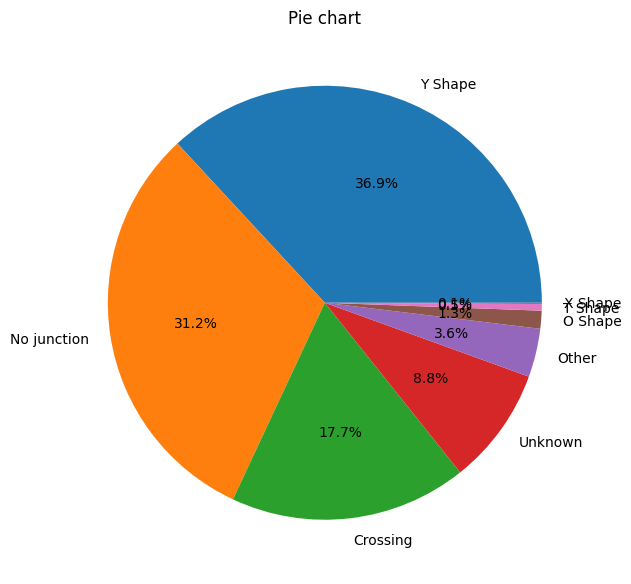

In [13]:
#Pie Chart

count = df['Types_of_Junction'].value_counts()
labels = count.index.tolist()
plt.figure(figsize=(7, 10))
plt.pie(list(count), labels = labels, autopct = '%1.1f%%')
plt.title("Pie chart")
plt.show()

In [14]:
df.columns

Index(['Age_band_of_driver', 'Driving_experience', 'Types_of_Junction',
       'Weather_conditions', 'Type_of_collision', 'Cause_of_accident'],
      dtype='object')

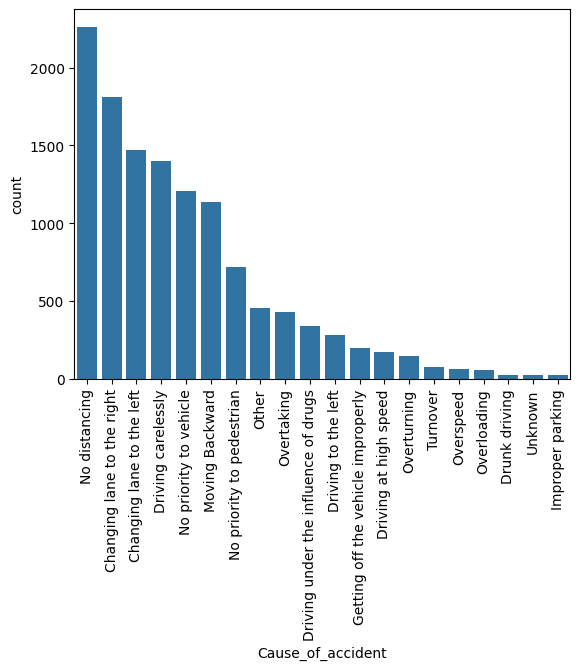

In [15]:
# Count the occurrences of each type of collision
collision_counts = df["Cause_of_accident"].value_counts().reset_index()
collision_counts.columns = ["Cause_of_accident", "count"]

# Sort the counts in descending order
collision_counts = collision_counts.sort_values(by="count", ascending=False)

# Create a bar plot
ax = sns.barplot(x="Cause_of_accident", y="count", data=collision_counts)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)
plt.show()

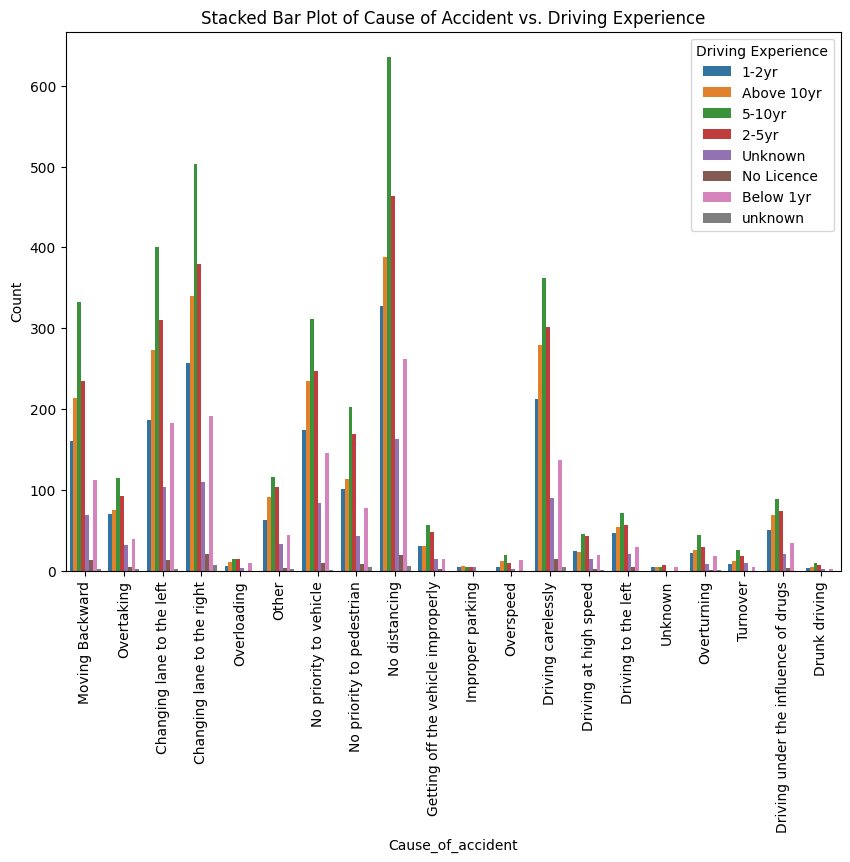

In [16]:
# Create a count plot (stacked bar plot)
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='Cause_of_accident', hue='Driving_experience')
plt.title('Stacked Bar Plot of Cause of Accident vs. Driving Experience')
plt.xlabel('Cause_of_accident')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Driving Experience')

plt.show()

In [17]:
#No of accidents occured due to 'No distancing'
#Most no of accidents are occured due to 'No distancing'
df = df[(df['Cause_of_accident'] == 'No distancing')]
df.value_counts().sum()

2263

In [18]:
#No of accidents occured due to what type of junction 
#Most accidents are occured in Y Shape junction 
df['Types_of_Junction'].value_counts()

Types_of_Junction
Y Shape        842
No junction    729
Crossing       377
Unknown        198
Other           72
O Shape         29
T Shape         12
X Shape          4
Name: count, dtype: int64

In [19]:
df = df[(df['Cause_of_accident'] == 'No distancing') & (df['Types_of_Junction'] == 'Y Shape')].value_counts()

In [20]:
#Accidents occured due to 'No distancing' and on "Y Shape" junction 
df.sum()

842